In [1]:
from datascience import *
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
fashion_textiles = Table.read_table("Plastic-based-Textiles-in-clothing-industry.csv")
fashion_textiles

Company | Product_Type    | Production_Year | Greenhouse_Gas_Emissions | Pollutants_Emitted | Water_Consumption | Energy_Consumption | Waste_Generation | Sales_Revenue
Zara    | Polyester       | 2020            | 5000                     | 20                 | 7500              | 1200               | 300              | 500000
Zara    | Nylon           | 2019            | 3000                     | 15                 | 5000              | 900                | 200              | 450000
Zara    | Recycled_Poly   | 2021            | 3500                     | 18                 | 6000              | 1100               | 250              | 480000
Zara    | Cotton          | 2018            | 2000                     | 10                 | 4500              | 800                | 180              | 550000
Zara    | Synthetic_Blend | 2022            | 6000                     | 25                 | 8000              | 1500               | 350              | 600000
Zara    | Organic_Cotton  | 2019            | 2500                     | 12                 | 4000              | 700                | 150              | 420000
Zara    | Polyester       | 2021            | 4500                     | 22                 | 7000              | 1300               | 280              | 550000
Zara    | Recycled_Poly   | 2020            | 3800                     | 16                 | 5500              | 1000               | 220              | 510000
Zara    | Microfiber      | 2022            | 4800                     | 19                 | 6800              | 1100               | 270              | 530000
Zara    | Linen           | 2019            | 2100                     | 11                 | 4800              | 850                | 200              | 470000
... (6946 rows omitted)

In [3]:
fashion_textiles.group("Product_Type").show()

In [4]:
fashion_textiles.group("Company").show()

In [5]:
fashion_textiles.group("Production_Year").show()

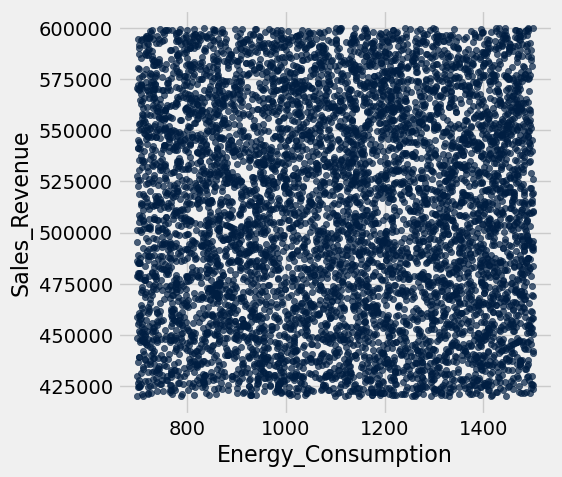

In [6]:
fashion_textiles.scatter("Energy_Consumption", "Sales_Revenue")

In [7]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

In [8]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [9]:
correlation(fashion_textiles, "Energy_Consumption", "Sales_Revenue")

-0.0043307404897318024

In [10]:
correlation(fashion_textiles, "Greenhouse_Gas_Emissions", "Sales_Revenue")

0.00907212008745901

In [11]:
correlation(fashion_textiles, "Pollutants_Emitted", "Sales_Revenue")

0.014403995428592392

In [12]:
correlation(fashion_textiles, "Water_Consumption", "Sales_Revenue")

0.0037226933590159251

In [13]:
correlation(fashion_textiles, "Waste_Generation", "Sales_Revenue")

0.0066415506703777737

In [14]:
fashion_data_2018 = fashion_textiles.where("Production_Year", are.equal_to(2018))
fashion_data_2018.show(5)

In [15]:
correlation(fashion_data_2018, "Greenhouse_Gas_Emissions", "Sales_Revenue")

0.0024665819152356692

In [16]:
correlation(fashion_data_2018, "Pollutants_Emitted", "Sales_Revenue")

0.041873105917530754

In [17]:
correlation(fashion_data_2018, "Water_Consumption", "Sales_Revenue")

-0.026222655527283003

In [18]:
correlation(fashion_data_2018, "Energy_Consumption", "Sales_Revenue")

-0.0272544396969964

In [19]:
correlation(fashion_data_2018, "Waste_Generation", "Sales_Revenue")

0.01930828226082618

In [20]:
fashion_data_zara = fashion_textiles.where("Company", are.equal_to("Zara"))
fashion_data_zara.show(5)

In [21]:
correlation(fashion_data_zara, "Greenhouse_Gas_Emissions", "Sales_Revenue")

0.012718106959123896

In [22]:
correlation(fashion_data_zara, "Pollutants_Emitted", "Sales_Revenue")

0.027797223359041615

In [23]:
correlation(fashion_data_zara, "Water_Consumption", "Sales_Revenue")

0.031636580867626926

In [24]:
correlation(fashion_data_zara, "Energy_Consumption", "Sales_Revenue")

0.010187971733949476

In [25]:
correlation(fashion_data_zara, "Waste_Generation", "Sales_Revenue")

-0.0028764389192086209

In [26]:
correlation(fashion_data_zara, "Waste_Generation", "Energy_Consumption")

0.068665558120905343

In [27]:
correlation(fashion_data_zara, "Water_Consumption", "Energy_Consumption")

0.0087253261153210013

In [28]:
fashion_data_polyester = fashion_textiles.where("Product_Type", are.equal_to("Polyester"))
fashion_data_polyester.show(5)

In [29]:
fashion_data_plastic = fashion_textiles.where("Product_Type", are.contained_in(["Polyester", "Nylon", "Synthetic_Blend", "Recycled_Poly", "Microfiber"]))
fashion_data_plastic.show(5)

In [30]:
correlation(fashion_data_polyester, "Greenhouse_Gas_Emissions", "Sales_Revenue")

0.054016913065136854

In [31]:
correlation(fashion_data_polyester, "Pollutants_Emitted", "Sales_Revenue")

0.032492325378948084

In [32]:
correlation(fashion_data_polyester, "Water_Consumption", "Sales_Revenue")

-0.0046255256156438771

In [33]:
correlation(fashion_data_polyester, "Energy_Consumption", "Sales_Revenue")

-0.052784576505038469

In [34]:
correlation(fashion_data_polyester, "Waste_Generation", "Sales_Revenue")

-0.016388996703361386

In [35]:
correlation(fashion_data_polyester, "Waste_Generation", "Energy_Consumption")

0.11932902119255671

In [36]:
correlation(fashion_data_polyester, "Water_Consumption", "Energy_Consumption")

0.051303058830801766

In [37]:
# Convert datasci Table to pandas DataFrame
df = fashion_textiles.to_df()

# Now use DataFrame correlation
corr_matrix = df[['Energy_Consumption', 
                  'Sales_Revenue',
                  'Greenhouse_Gas_Emissions', 
                  'Water_Consumption',
                  'Waste_Generation', 
                  'Pollutants_Emitted']].corr()
corr_matrix

Energy_Consumption  Sales_Revenue  \
Energy_Consumption                  1.000000      -0.004331   
Sales_Revenue                      -0.004331       1.000000   
Greenhouse_Gas_Emissions            0.007513       0.009072   
Water_Consumption                   0.000882       0.003723   
Waste_Generation                    0.010343       0.006642   
Pollutants_Emitted                  0.018488       0.014404   

                          Greenhouse_Gas_Emissions  Water_Consumption  \
Energy_Consumption                        0.007513           0.000882   
Sales_Revenue                             0.009072           0.003723   
Greenhouse_Gas_Emissions                  1.000000          -0.014350   
Water_Consumption                        -0.014350           1.000000   
Waste_Generation                          0.002525          -0.012125   
Pollutants_Emitted                        0.005829          -0.006414   

                          Waste_Generation  Pollutants_Emitted  
Energy_Consumption                0.010343            0.018488  
Sales_Revenue                     0.006642            0.014404  
Greenhouse_Gas_Emissions          0.002525            0.005829  
Water_Consumption                -0.012125           -0.006414  
Waste_Generation                  1.000000            0.024984  
Pollutants_Emitted                0.024984            1.000000

In [38]:
# Step 1: Add log-transformed columns to your table
fashion_textiles = fashion_textiles.with_columns(
    'log_GHG', np.log10(fashion_textiles.column('Greenhouse_Gas_Emissions')),
    'log_Pollutants_Emitted', np.log10(fashion_textiles.column('Pollutants_Emitted')),
    'log_Water_Consumption', np.log10(fashion_textiles.column('Water_Consumption')),
    'log_Energy_Consumption', np.log10(fashion_textiles.column('Energy_Consumption')),
    'log_Sales_Revenue', np.log10(fashion_textiles.column('Sales_Revenue')),
    'log_Waste_Generation', np.log10(fashion_textiles.column('Waste_Generation'))
)

# Step 2: Convert to a pandas DataFrame
df = fashion_textiles.to_df()

# Step 3: Compute the correlation matrix on log columns
log_cols = ['log_GHG', 'log_Pollutants_Emitted', 'log_Water_Consumption',
            'log_Energy_Consumption', 'log_Sales_Revenue', 'log_Waste_Generation']
corr_matrix_log = df[log_cols].corr()
print(corr_matrix_log)

                         log_GHG  log_Pollutants_Emitted  \
log_GHG                 1.000000                0.007084   
log_Pollutants_Emitted  0.007084                1.000000   
log_Water_Consumption  -0.014412               -0.007780   
log_Energy_Consumption  0.008718                0.016475   
log_Sales_Revenue       0.007680                0.013809   
log_Waste_Generation   -0.001491                0.024958   

                        log_Water_Consumption  log_Energy_Consumption  \
log_GHG                             -0.014412                0.008718   
log_Pollutants_Emitted              -0.007780                0.016475   
log_Water_Consumption                1.000000                0.002104   
log_Energy_Consumption               0.002104                1.000000   
log_Sales_Revenue                    0.004718               -0.004197   
log_Waste_Generation                -0.010396                0.009918   

                        log_Sales_Revenue  log_Waste_Generation  
l

In [39]:
# Convert datasci Table to pandas DataFrame
df_zara = fashion_data_zara.to_df()

# Now use DataFrame correlation
corr_matrix_zara = df_zara[['Energy_Consumption', 
                           'Sales_Revenue',
                           'Greenhouse_Gas_Emissions', 
                           'Water_Consumption',
                           'Waste_Generation', 
                           'Pollutants_Emitted']].corr()
corr_matrix_zara

Energy_Consumption  Sales_Revenue  \
Energy_Consumption                  1.000000       0.010188   
Sales_Revenue                       0.010188       1.000000   
Greenhouse_Gas_Emissions            0.007161       0.012718   
Water_Consumption                   0.008725       0.031637   
Waste_Generation                    0.068666      -0.002876   
Pollutants_Emitted                  0.034908       0.027797   

                          Greenhouse_Gas_Emissions  Water_Consumption  \
Energy_Consumption                        0.007161           0.008725   
Sales_Revenue                             0.012718           0.031637   
Greenhouse_Gas_Emissions                  1.000000          -0.043775   
Water_Consumption                        -0.043775           1.000000   
Waste_Generation                         -0.004927           0.001673   
Pollutants_Emitted                       -0.013759          -0.024450   

                          Waste_Generation  Pollutants_Emitted  
Energy_Consumption                0.068666            0.034908  
Sales_Revenue                    -0.002876            0.027797  
Greenhouse_Gas_Emissions         -0.004927           -0.013759  
Water_Consumption                 0.001673           -0.024450  
Waste_Generation                  1.000000            0.037920  
Pollutants_Emitted                0.037920            1.000000

In [40]:
# Convert datasci Table to pandas DataFrame
df_polyester = fashion_data_polyester.to_df()

# Now use DataFrame correlation
corr_matrix_polyester = df_polyester[['Energy_Consumption', 
                                    'Sales_Revenue',
                                    'Greenhouse_Gas_Emissions', 
                                    'Water_Consumption',
                                    'Waste_Generation', 
                                    'Pollutants_Emitted']].corr()
corr_matrix_polyester

Energy_Consumption  Sales_Revenue  \
Energy_Consumption                  1.000000      -0.052785   
Sales_Revenue                      -0.052785       1.000000   
Greenhouse_Gas_Emissions            0.034935       0.054017   
Water_Consumption                   0.051303      -0.004626   
Waste_Generation                    0.119329      -0.016389   
Pollutants_Emitted                  0.052425       0.032492   

                          Greenhouse_Gas_Emissions  Water_Consumption  \
Energy_Consumption                        0.034935           0.051303   
Sales_Revenue                             0.054017          -0.004626   
Greenhouse_Gas_Emissions                  1.000000          -0.020048   
Water_Consumption                        -0.020048           1.000000   
Waste_Generation                         -0.034182           0.070385   
Pollutants_Emitted                        0.028098          -0.018921   

                          Waste_Generation  Pollutants_Emitted  
Energy_Consumption                0.119329            0.052425  
Sales_Revenue                    -0.016389            0.032492  
Greenhouse_Gas_Emissions         -0.034182            0.028098  
Water_Consumption                 0.070385           -0.018921  
Waste_Generation                  1.000000            0.028055  
Pollutants_Emitted                0.028055            1.000000

In [41]:
# Convert datasci Table to pandas DataFrame
df_plastic = fashion_data_plastic.to_df()

# Now use DataFrame correlation
corr_matrix_plastic = df_plastic[['Energy_Consumption', 
                                    'Sales_Revenue',
                                    'Greenhouse_Gas_Emissions', 
                                    'Water_Consumption',
                                    'Waste_Generation', 
                                    'Pollutants_Emitted']].corr()
corr_matrix_plastic

Energy_Consumption  Sales_Revenue  \
Energy_Consumption                  1.000000      -0.009464   
Sales_Revenue                      -0.009464       1.000000   
Greenhouse_Gas_Emissions            0.017446       0.007682   
Water_Consumption                  -0.011516      -0.005849   
Waste_Generation                    0.032671       0.019611   
Pollutants_Emitted                  0.024006       0.006191   

                          Greenhouse_Gas_Emissions  Water_Consumption  \
Energy_Consumption                        0.017446          -0.011516   
Sales_Revenue                             0.007682          -0.005849   
Greenhouse_Gas_Emissions                  1.000000          -0.018628   
Water_Consumption                        -0.018628           1.000000   
Waste_Generation                         -0.000882           0.026600   
Pollutants_Emitted                        0.022095          -0.011676   

                          Waste_Generation  Pollutants_Emitted  
Energy_Consumption                0.032671            0.024006  
Sales_Revenue                     0.019611            0.006191  
Greenhouse_Gas_Emissions         -0.000882            0.022095  
Water_Consumption                 0.026600           -0.011676  
Waste_Generation                  1.000000            0.036469  
Pollutants_Emitted                0.036469            1.000000

In [42]:
from scipy.stats import spearmanr

r_s, p_s = spearmanr(df['log_Energy_Consumption'], df['log_Sales_Revenue'])
print(f"Spearman rho = {r_s:.3f}, p-value = {p_s:.4f}")

Spearman rho = -0.004, p-value = 0.7212


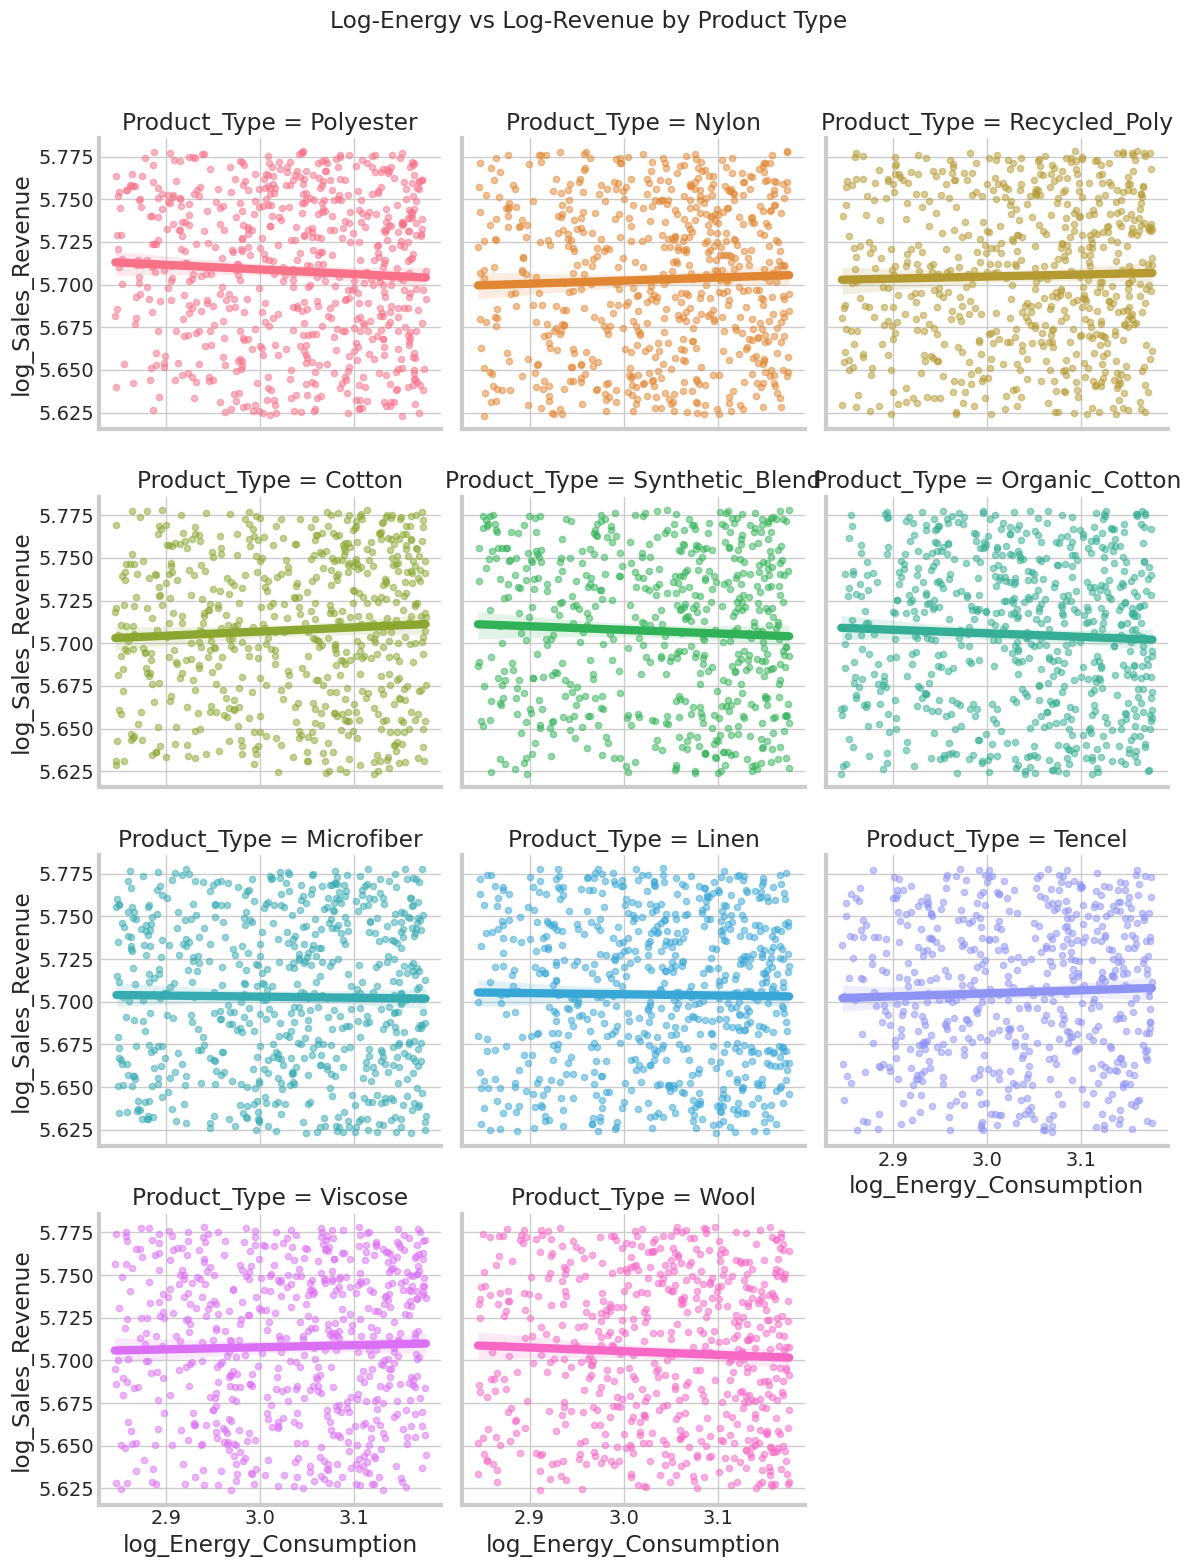

In [43]:

sns.set_style("whitegrid")

sns.lmplot(
    data = df,
    x = "log_Energy_Consumption",
    y = "log_Sales_Revenue",
    col = "Product_Type",
    hue = "Product_Type",
    col_wrap = 3,
    scatter_kws = {'alpha':0.5, 's':20},
    height = 4,
    facet_kws = {'sharex': True, 'sharey': True}
)

plots.subplots_adjust(top=0.9)
plots.suptitle("Log-Energy vs Log-Revenue by Product Type")
plots.show()


In [44]:
for pt in df['Product_Type'].unique():
    subset = df[df['Product_Type'] == pt]
    r = subset['log_Energy_Consumption'].corr(subset['log_Sales_Revenue'])
    print(pt, f"r = {r:.2f}")

Polyester r = -0.06
Nylon r = 0.04
Recycled_Poly r = 0.03
Cotton r = 0.06
Synthetic_Blend r = -0.05
Organic_Cotton r = -0.04
Microfiber r = -0.01
Linen r = -0.01
Tencel r = 0.04
Viscose r = 0.03
Wool r = -0.05


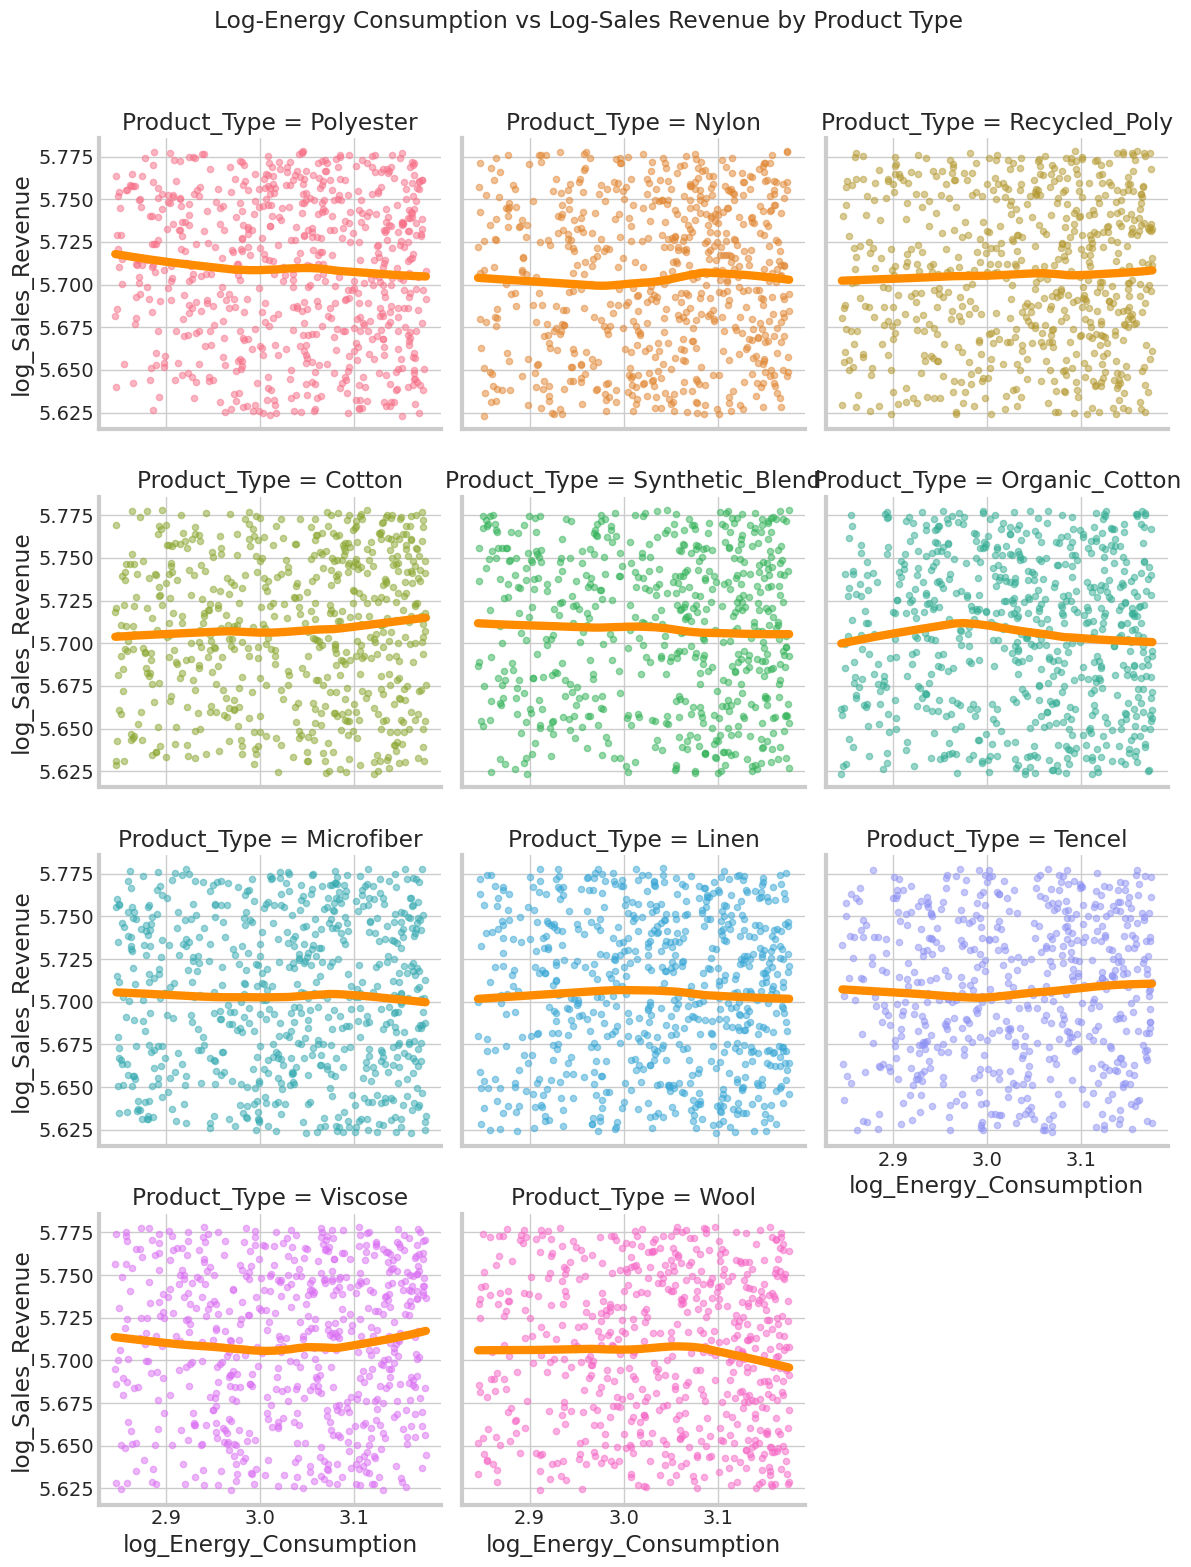

In [45]:

sns.set_style("whitegrid")

# Create a faceted scatter + regression plot
sns.lmplot(
    data = df,
    x = "log_Energy_Consumption",
    y = "log_Sales_Revenue",
    col = "Product_Type",
    hue = "Product_Type",
    col_wrap = 3,    
    scatter_kws = {'alpha':0.5, 's':20},
    height = 4,
    facet_kws = {'sharex': True, 'sharey': True},
    lowess = True, 
    line_kws = {'color': 'darkorange'},
    ci = None
)

plots.subplots_adjust(top=0.9)
plots.suptitle("Log-Energy Consumption vs Log-Sales Revenue by Product Type")
plots.show()

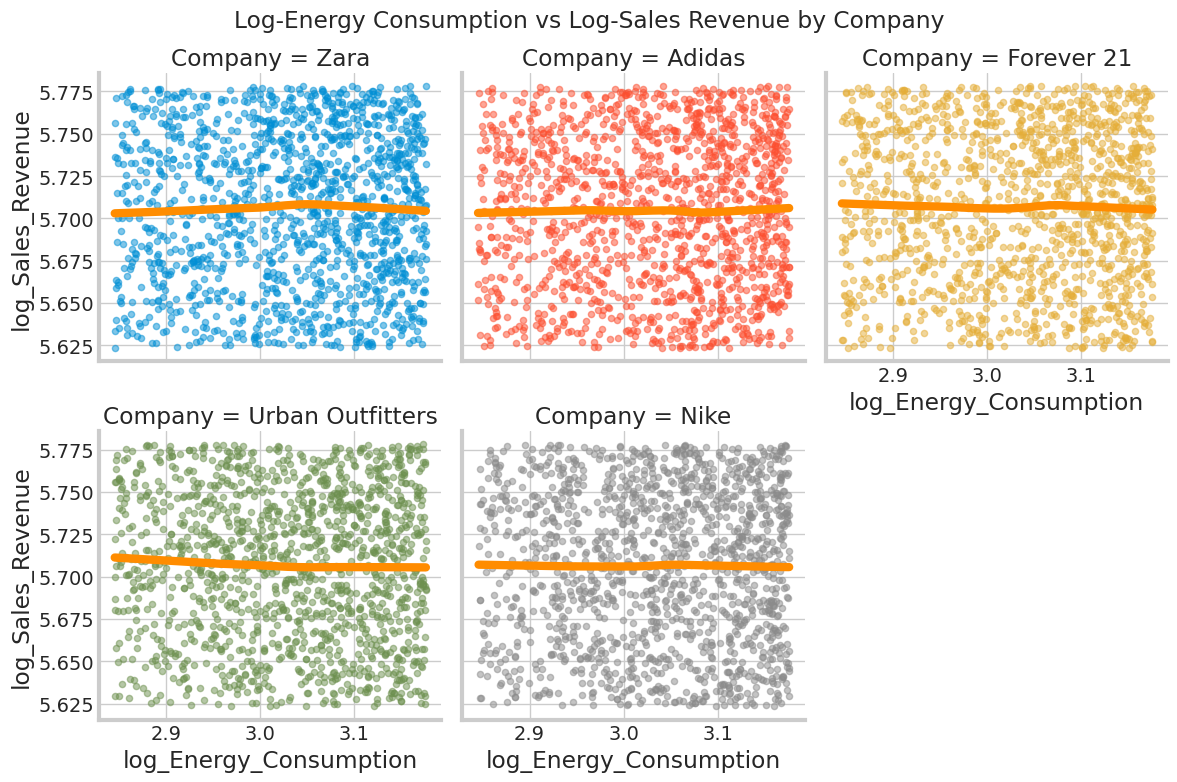

In [46]:
sns.set_style("whitegrid")

# Create a faceted scatter + regression plot
sns.lmplot(
    data = df,
    x = "log_Energy_Consumption",
    y = "log_Sales_Revenue",
    col = "Company",
    hue = "Company",
    col_wrap = 3,    
    scatter_kws = {'alpha':0.5, 's':20},
    height = 4,
    facet_kws = {'sharex': True, 'sharey': True},
    lowess=True, 
    line_kws= {'color': 'darkorange'},
    ci = None
)

plots.subplots_adjust(top=0.9)
plots.suptitle("Log-Energy Consumption vs Log-Sales Revenue by Company")
plots.show()

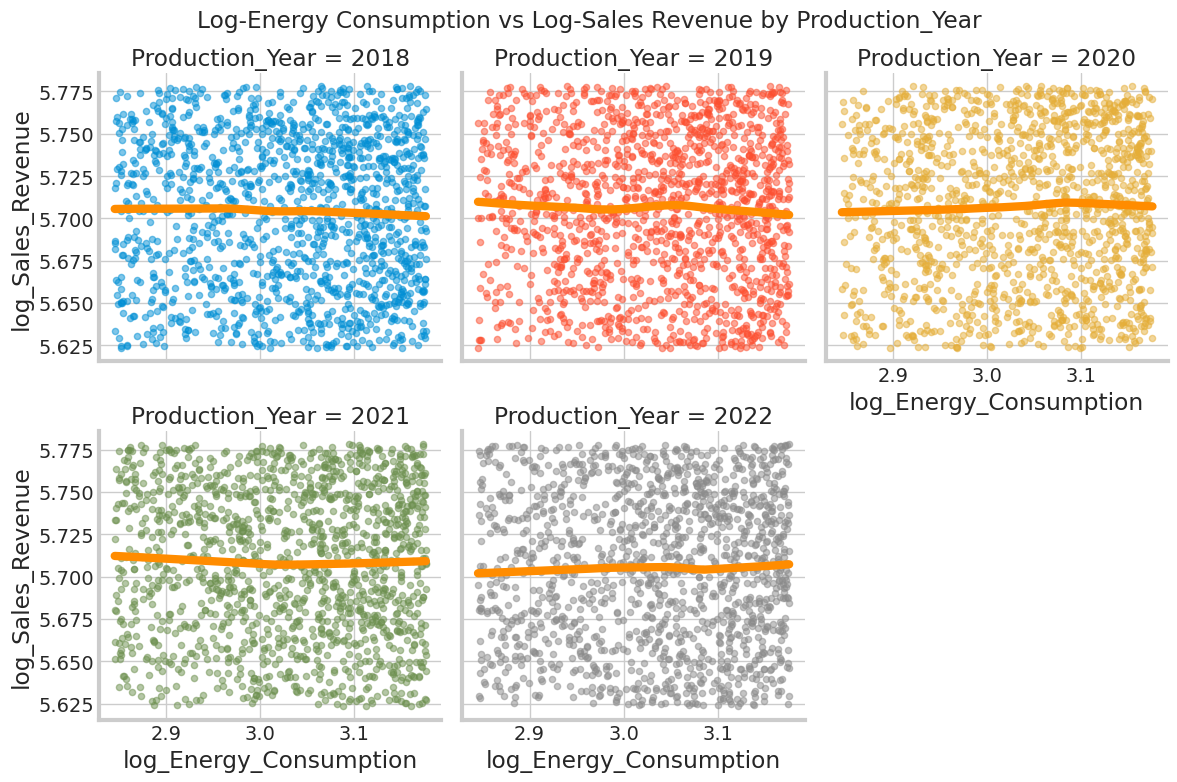

In [47]:
sns.set_style("whitegrid")

# Create a faceted scatter + regression plot
sns.lmplot(
    data = df,
    x = "log_Energy_Consumption",
    y = "log_Sales_Revenue",
    col = "Production_Year",
    hue = "Production_Year",
    col_wrap = 3,    
    scatter_kws = {'alpha':0.5, 's':20},
    height = 4,
    facet_kws = {'sharex': True, 'sharey': True},
    lowess=True, 
    line_kws= {'color': 'darkorange'},
    ci = None
)

plots.subplots_adjust(top=0.9)
plots.suptitle("Log-Energy Consumption vs Log-Sales Revenue by Production_Year")
plots.show()

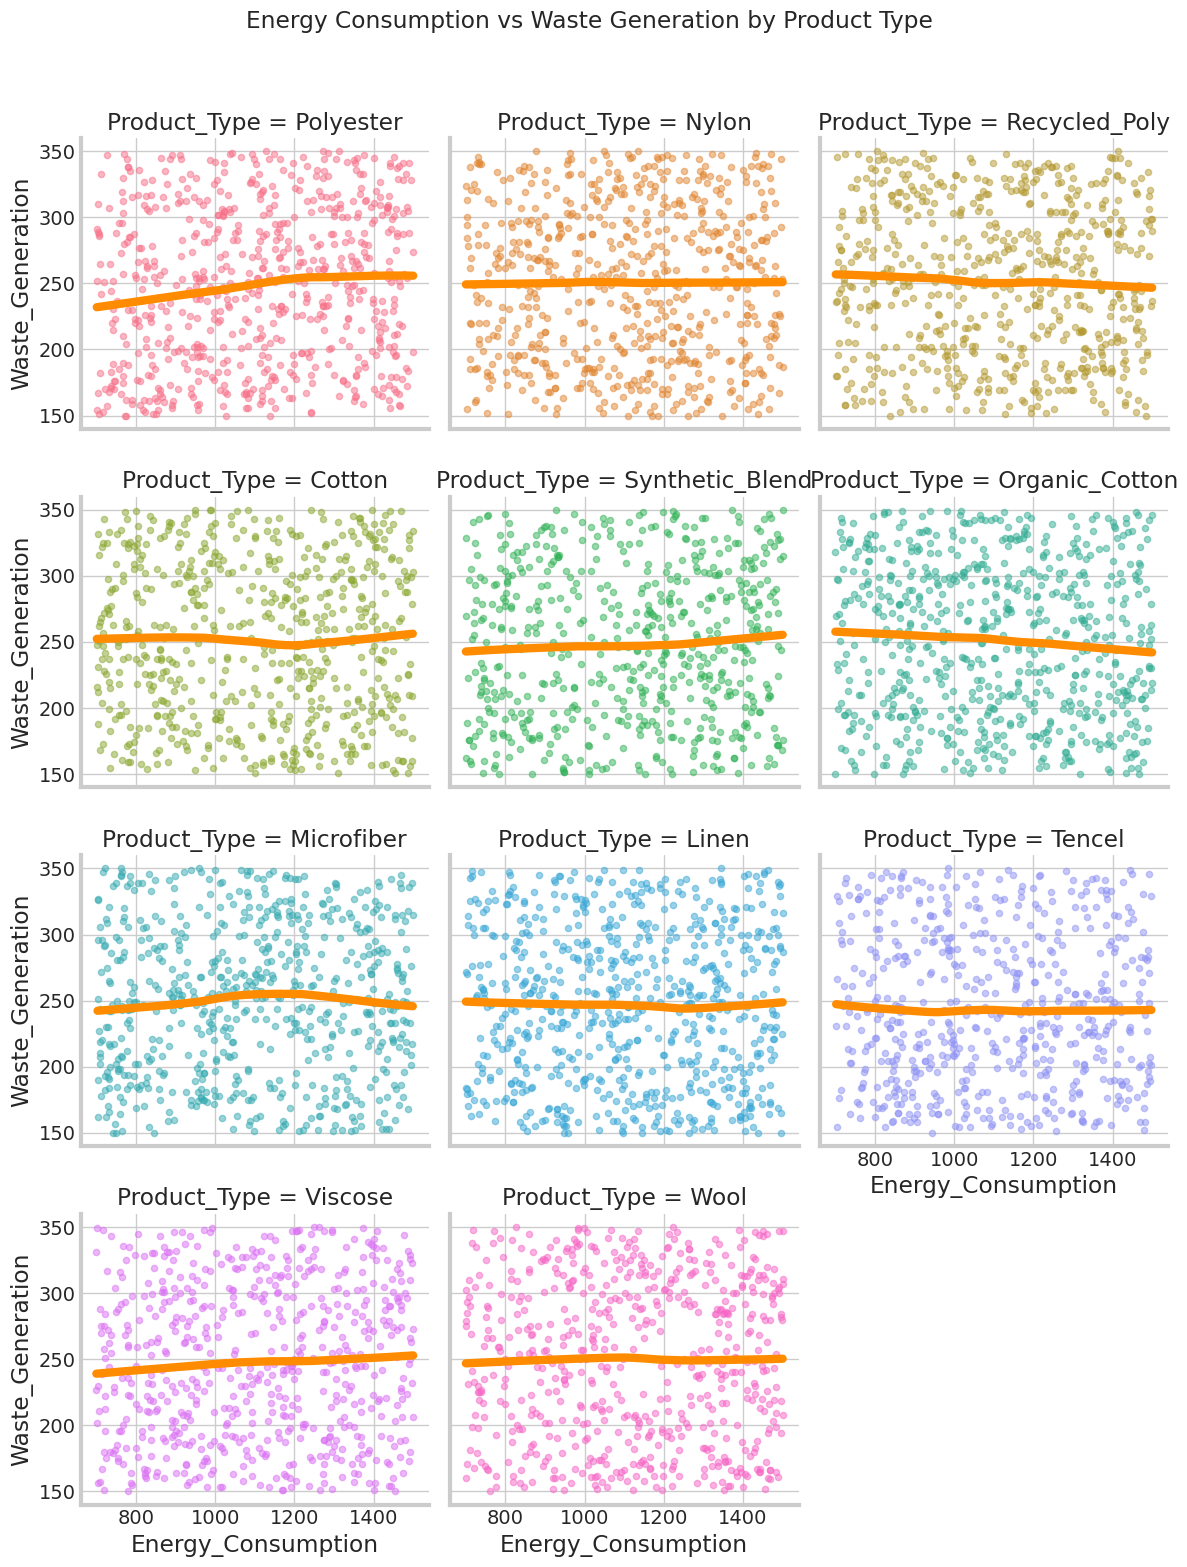

In [48]:
sns.set_style("whitegrid")

# Create a faceted scatter + regression plot
sns.lmplot(
    data = df,
    x = "Energy_Consumption",
    y = "Waste_Generation",
    col = "Product_Type",
    hue = "Product_Type",
    col_wrap = 3,    
    scatter_kws = {'alpha':0.5, 's':20},
    height = 4,
    facet_kws = {'sharex': True, 'sharey': True},
    lowess=True, 
    line_kws= {'color': 'darkorange'},
    ci = None
)

plots.subplots_adjust(top=0.9)
plots.suptitle("Energy Consumption vs Waste Generation by Product Type")
plots.show()

In [49]:
df['Energy_Intensity'] = df['Energy_Consumption'] / df['Sales_Revenue']
df['log_Energy_Intensity'] = df['log_Energy_Consumption'] / df['log_Sales_Revenue']
df['log_Waste_Generation_Intensity'] = df['log_Waste_Generation'] / df['log_Sales_Revenue']

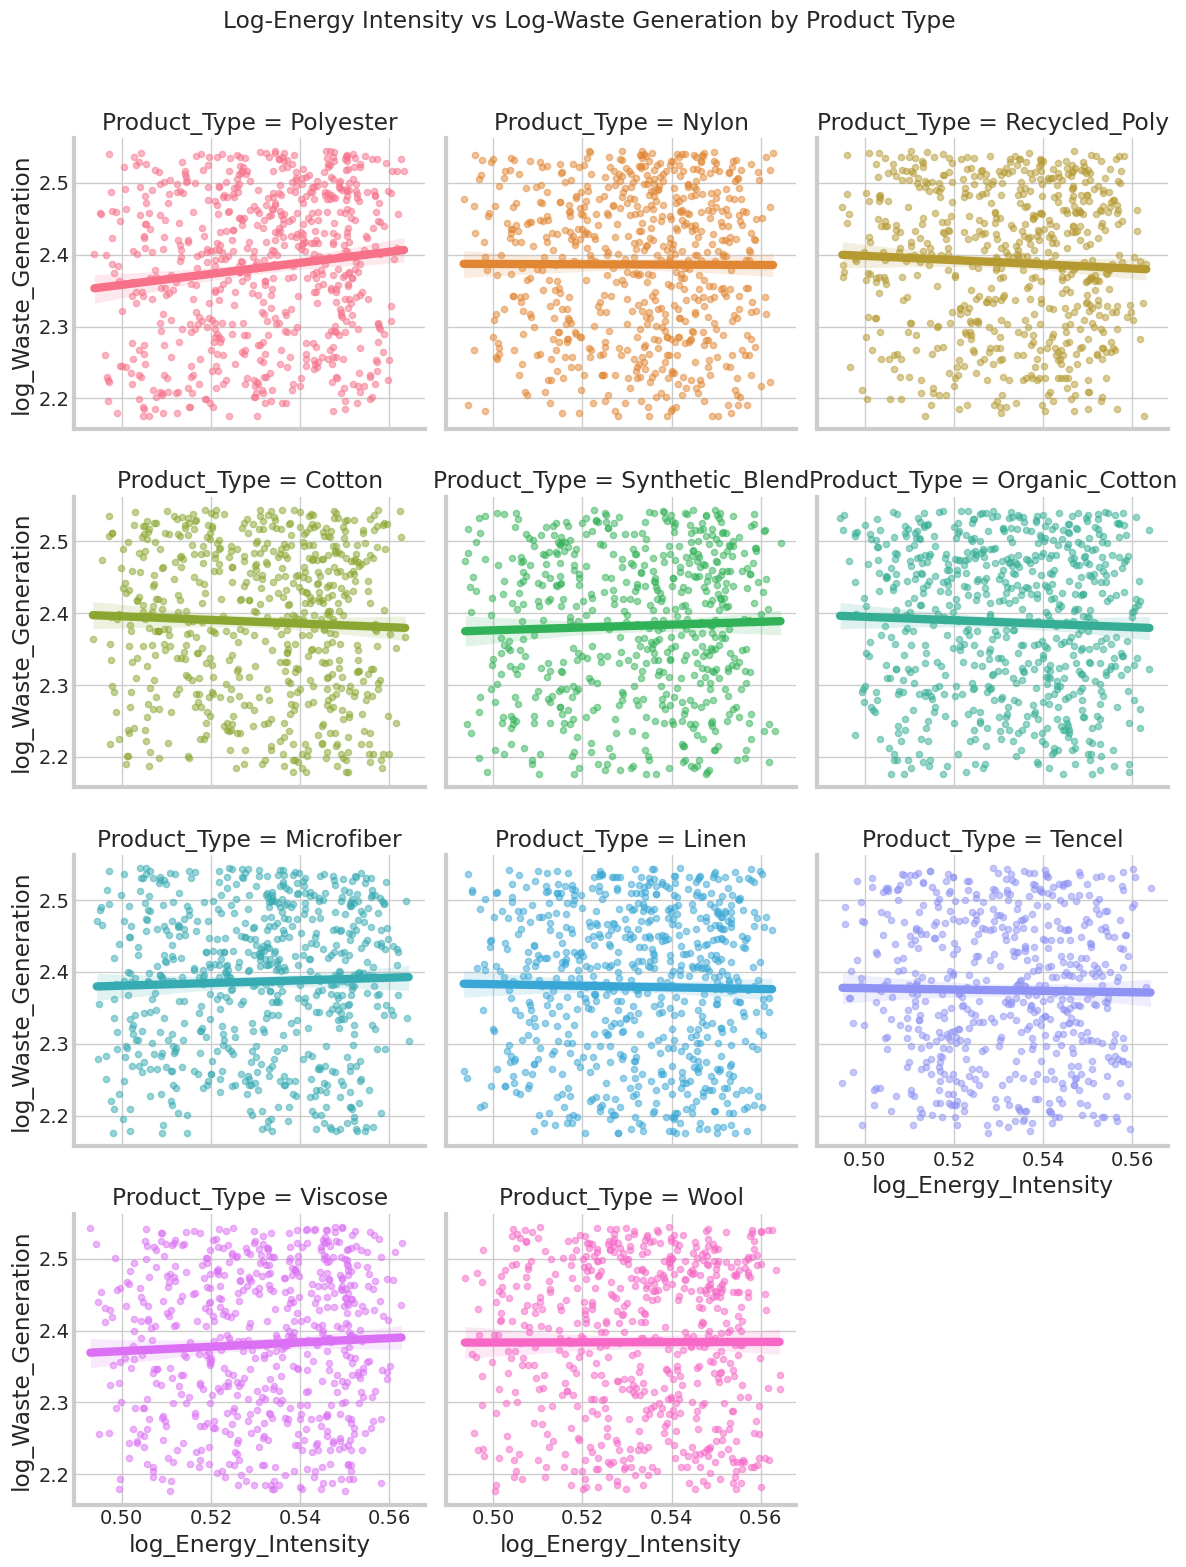

In [50]:
sns.set_style("whitegrid")

# Create a faceted scatter + regression plot
sns.lmplot(
    data = df,
    x = "log_Energy_Intensity",
    y = "log_Waste_Generation",
    col = "Product_Type",
    hue = "Product_Type",
    col_wrap = 3,
    scatter_kws = {'alpha':0.5, 's':20},
    height = 4,
    facet_kws = {'sharex': True, 'sharey': True}
)

plots.subplots_adjust(top=0.9)
plots.suptitle("Log-Energy Intensity vs Log-Waste Generation by Product Type")
plots.show()

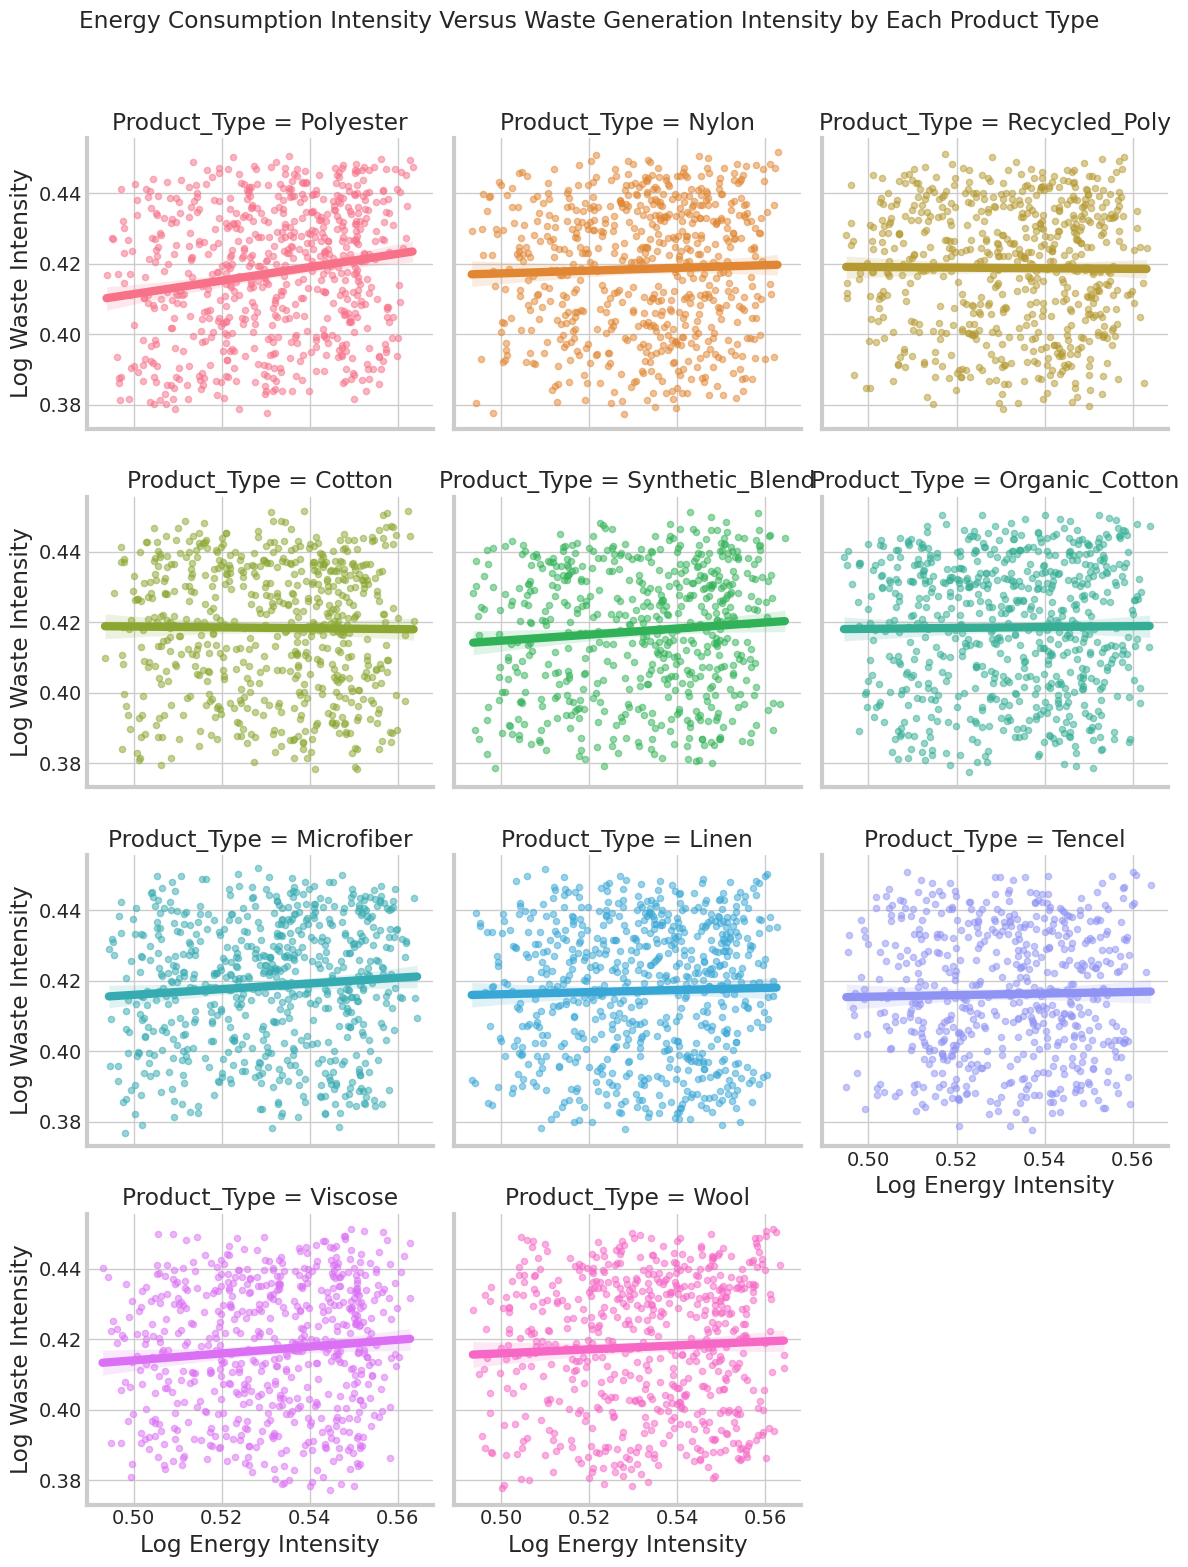

In [51]:
sns.set_style("whitegrid")

# Create a faceted scatter + regression plot
log_correlation_plot = sns.lmplot(data = df,
                                  x = "log_Energy_Intensity",
                                  y = "log_Waste_Generation_Intensity",
                                  col = "Product_Type",
                                  hue = "Product_Type",
                                  col_wrap = 3,
                                  scatter_kws = {'alpha':0.5, 's':20},
                                  height = 4,
                                  facet_kws = {'sharex': True, 'sharey': True}
)

log_correlation_plot.set_axis_labels("Log Energy Intensity", 
                                     "Log Waste Intensity")
log_correlation_plot.fig.subplots_adjust(top=0.9)
log_correlation_plot.fig.suptitle("Energy Consumption Intensity Versus Waste Generation Intensity by Each Product Type")
plots.show()

In [52]:
for pt in df['Product_Type'].unique():
    subset = df[df['Product_Type'] == pt]
    r = subset['log_Energy_Intensity'].corr(subset['log_Waste_Generation_Intensity'])
    print(pt, f"r = {r:.4f}")

Polyester r = 0.1726
Nylon r = 0.0345
Recycled_Poly r = -0.0083
Cotton r = -0.0114
Synthetic_Blend r = 0.0847
Organic_Cotton r = 0.0114
Microfiber r = 0.0784
Linen r = 0.0270
Tencel r = 0.0204
Viscose r = 0.0883
Wool r = 0.0501


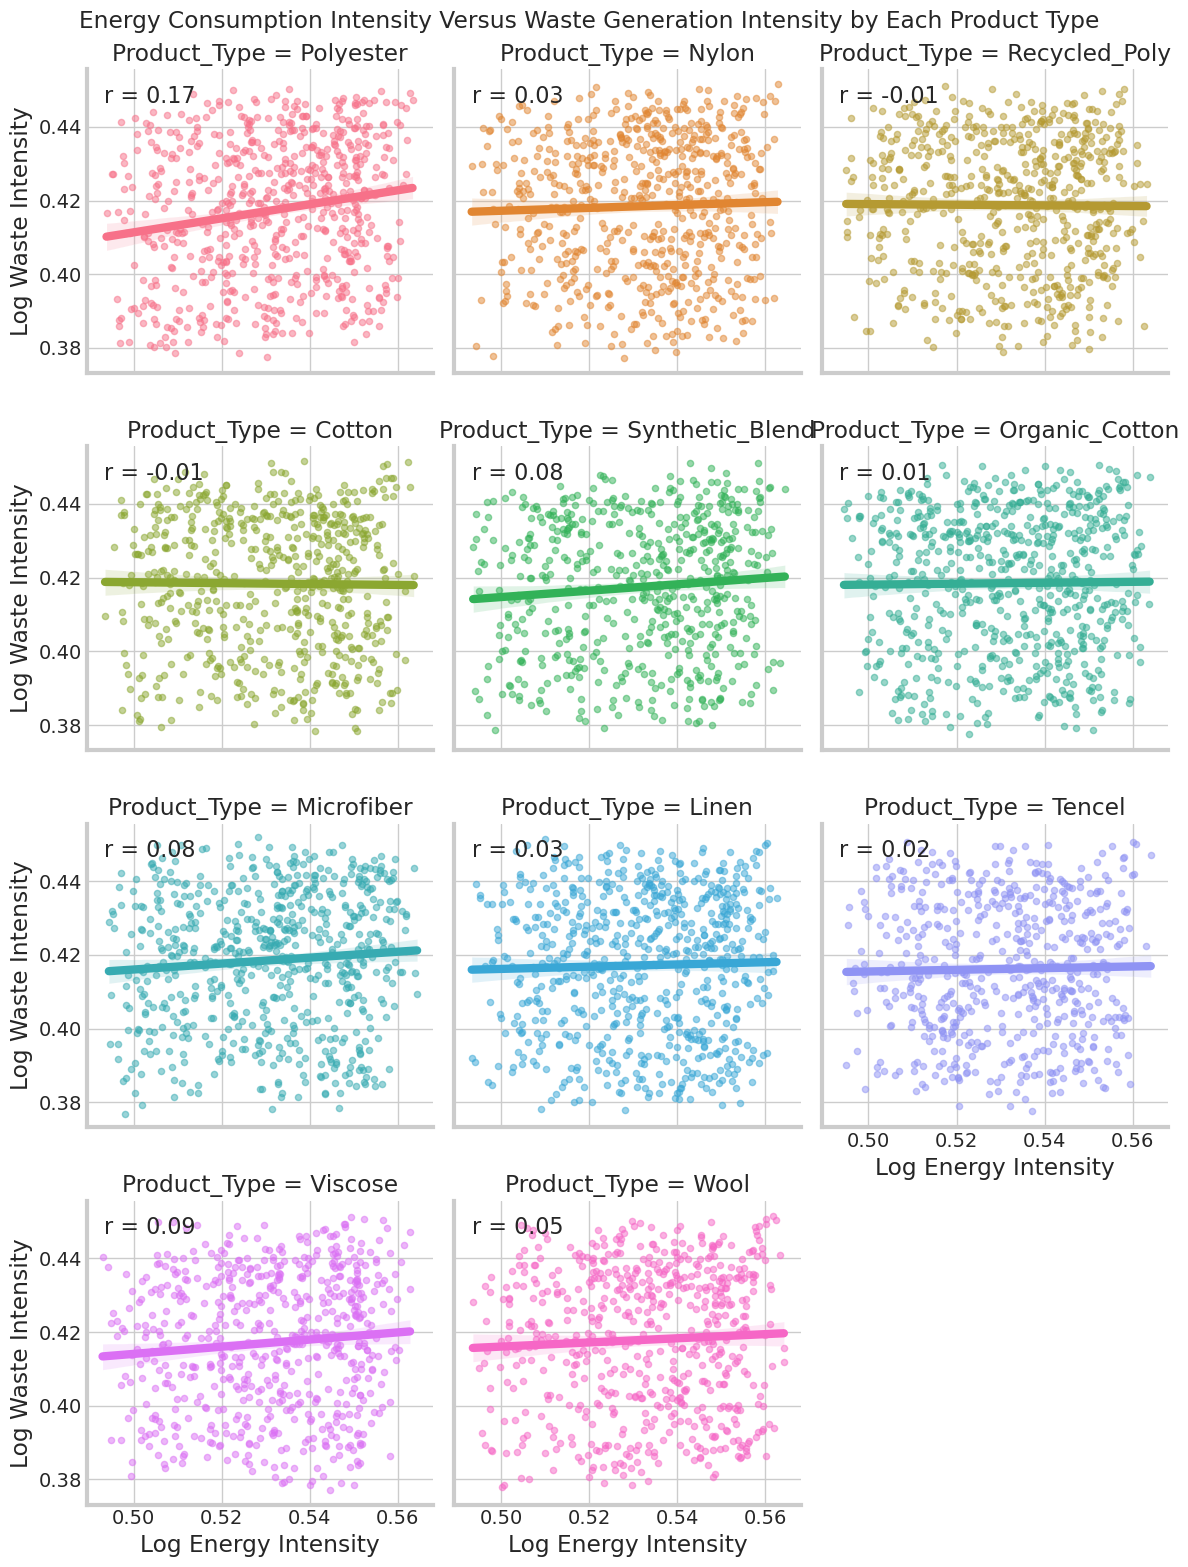

In [53]:
# Create faceted scatter plot
sns.set_style("whitegrid")
# Create a faceted scatter + regression plot
log_correlation_plot = sns.lmplot(data = df,
                                  x = "log_Energy_Intensity",
                                  y = "log_Waste_Generation_Intensity",
                                  col = "Product_Type",
                                  hue = "Product_Type",
                                  col_wrap = 3,
                                  scatter_kws = {'alpha':0.5, 's':20},
                                  height = 4,
                                  facet_kws = {'sharex': True, 'sharey': True}
)

# Compute Pearson's r per facet and annotate each subplot
for prod, ax in log_correlation_plot.axes_dict.items():
    subset = df[df['Product_Type'] == prod]
    if len(subset) >= 2:
        r_value, _ = pearsonr(subset['log_Energy_Intensity'], 
                              subset['log_Waste_Generation_Intensity'])
        ax.text(0.05, 0.95, f"r = {r_value:.2f}",
                transform=ax.transAxes,
                ha='left', va='top',
                fontsize = 16)

log_correlation_plot.set_axis_labels("Log Energy Intensity", "Log Waste Intensity")
log_correlation_plot.fig.subplots_adjust(top=0.9)
log_correlation_plot.fig.suptitle("Energy Consumption Intensity Versus Waste Generation Intensity by Each Product Type")
plots.tight_layout()
plots.show()

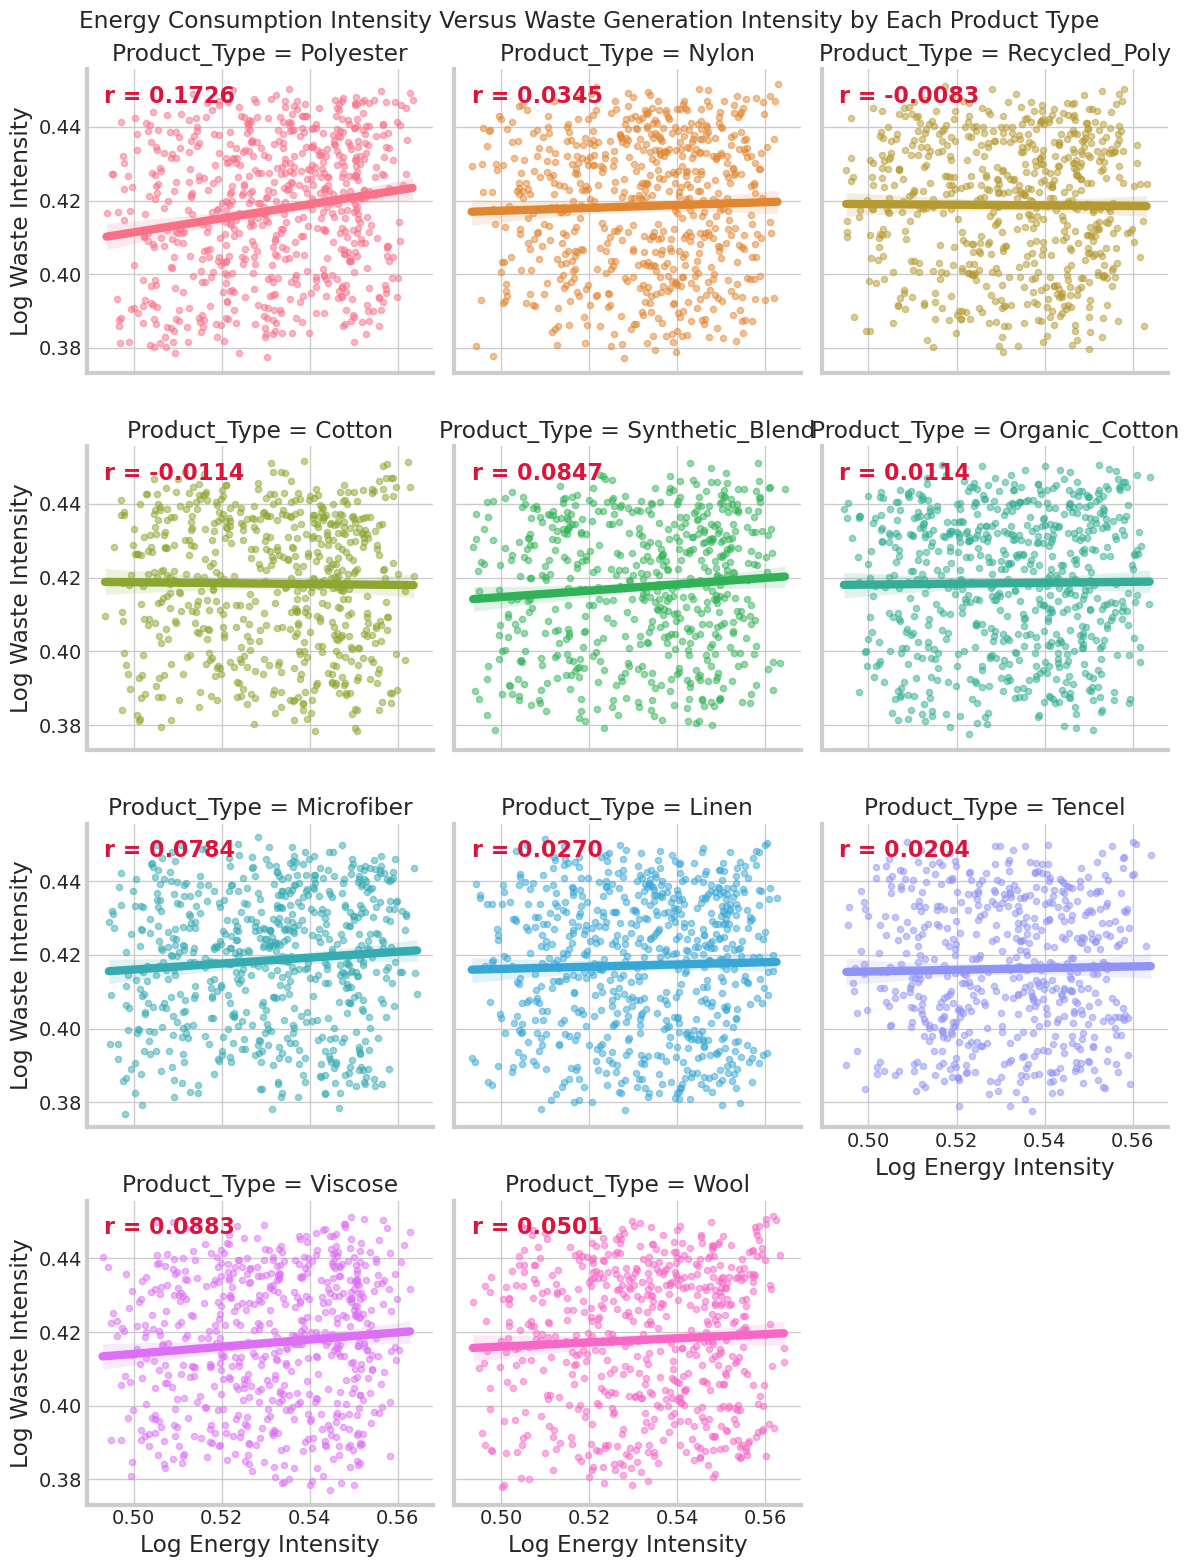

In [54]:
# Create faceted scatter plot
sns.set_style("whitegrid")
# Create a faceted scatter + regression plot
log_correlation_plot = sns.lmplot(data = df,
                                  x = "log_Energy_Intensity",
                                  y = "log_Waste_Generation_Intensity",
                                  col = "Product_Type",
                                  hue = "Product_Type",
                                  col_wrap = 3,
                                  scatter_kws = {'alpha':0.5, 's':20},
                                  height = 4,
                                  facet_kws = {'sharex': True, 'sharey': True}
)

# Compute Pearson's r per facet and annotate each subplot
for prod, ax in log_correlation_plot.axes_dict.items():
    subset = df[df['Product_Type'] == prod]
    if len(subset) >= 2:
        # compute Pearson's r
        r_value, _ = pearsonr(subset['log_Energy_Intensity'],
                              subset['log_Waste_Generation_Intensity'])
        
        line_color = ax.lines[0].get_color()

        # annotate with the same color
        ax.text(0.05, 0.95,
                f"r = {r_value:.4f}",
                transform = ax.transAxes,
                ha = 'left', va = 'top',
                fontsize = 16,
                color = 'crimson',   
                fontweight = 'bold')

log_correlation_plot.set_axis_labels("Log Energy Intensity", "Log Waste Intensity")
log_correlation_plot.fig.subplots_adjust(top=0.9)
log_correlation_plot.fig.suptitle("Energy Consumption Intensity Versus Waste Generation Intensity by Each Product Type")
plots.tight_layout()
plots.show()